In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
X, Y = np.loadtxt('pizza.txt', skiprows=1, unpack=True)

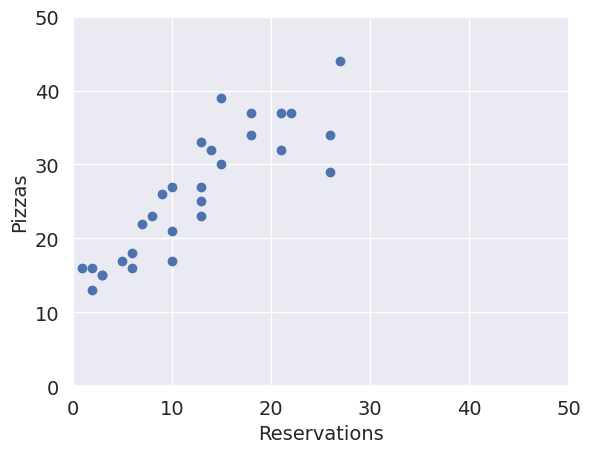

In [3]:
# Set the theme for seaborn plots
sea.set_theme()
# Set the axis limits for the plot [xmin, xmax, ymin, ymax]
plt.axis([0, 50, 0, 50])
# Set the font size for the x-axis ticks
plt.xticks(fontsize=14)
# Set the font size for the y-axis ticks
plt.yticks(fontsize=14)
# Set the label for the x-axis with a specific font size
plt.xlabel('Reservations', fontsize=14)
# Set the label for the y-axis with a specific font size
plt.ylabel('Pizzas', fontsize=14)
# Plot the data points with blue circles
plt.plot(X, Y, 'bo')

### Definiendo una funcion simple que modele la regresion lineal
## $$y = wx$$
Es la ecuacion de la recta que pasa por el origen, donde $m$ es la pendiente de la recta. podemos reescribirla con distinta notacion:
## $$ŷ = wx$$
La diferencia es que $ŷ$ es la prediccion de $y$ que hace el modelo. $y$ es lo que se conoce como ground truth. 

In [4]:
# Implementemos la regresión lineal
# Dada la pendiente de la recta y la cantidad de reservaciones X, el modelo predice cuantas pizzas se venderán
def predict_pizza_sales(X, w):
		return X * w

In [5]:
# ejemplo de uso
w = 2
print(predict_pizza_sales(21, w))

42


In [6]:
# la prediccion no coincide con el ground truth (32 pizzas vendidas)
# veamos cual de cuanto fue el error - MEAN SQUARED ERROR

error = predict_pizza_sales(21,w) - 32
squared_error = error ** 2

print(squared_error)

100


In [7]:
# ahora hagamoslo para el resto de los datos

def loss(AX, AY, w):
	error = (predict_pizza_sales(AX, w) - AY)
	squared_error = error ** 2
	return np.average(squared_error)

In [8]:
# probemos 
print(loss(X, Y, 0.5))

464.1666666666667


In [9]:
# Ahora implementemos la funcion para entrenar el modelo

def train(AX, AY, iterations, learning_rate):
	w = 0

	for i in range(iterations):
		curr_loss = loss(AX, AY, w)
		print(f"iteration {i} => current loss: {curr_loss}")

		if loss(AX, AY, w-learning_rate) < curr_loss:
			w = w-learning_rate
		elif loss(AX, AY, w+learning_rate) < curr_loss:
			w = w+learning_rate
		else:
			# no se pudo mejorar el modelo, detenemos el entrenamiento y retornamos el modelo actual
			return w
		
	raise Exception("No se pudo converger") 

In [10]:
# Empecemos a entrenar el modelo
w = train(X, Y, iterations=10000, learning_rate=0.01)
print("\nw=%.3f" % w)

iteration 0 => current loss: 812.8666666666667
iteration 1 => current loss: 804.8205466666666
iteration 2 => current loss: 796.8181866666666
iteration 3 => current loss: 788.8595866666668
iteration 4 => current loss: 780.9447466666668
iteration 5 => current loss: 773.0736666666668
iteration 6 => current loss: 765.2463466666667
iteration 7 => current loss: 757.4627866666666
iteration 8 => current loss: 749.7229866666669
iteration 9 => current loss: 742.0269466666667
iteration 10 => current loss: 734.3746666666665
iteration 11 => current loss: 726.7661466666667
iteration 12 => current loss: 719.2013866666668
iteration 13 => current loss: 711.6803866666667
iteration 14 => current loss: 704.2031466666667
iteration 15 => current loss: 696.7696666666667
iteration 16 => current loss: 689.3799466666668
iteration 17 => current loss: 682.0339866666666
iteration 18 => current loss: 674.7317866666667
iteration 19 => current loss: 667.4733466666668
iteration 20 => current loss: 660.2586666666667
it

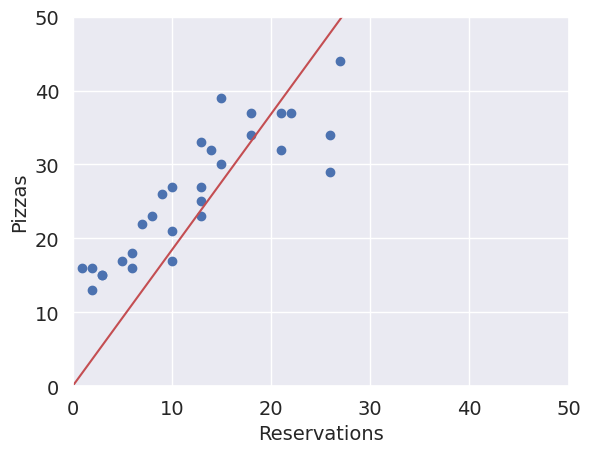

In [11]:
# ahora grafiquemos la recta obtenida junto con los datos
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Reservations', fontsize=14)
plt.ylabel('Pizzas', fontsize=14)
plt.plot(X, Y, 'bo')
plt.plot([0, 50], [0, 50*w], 'r')


In [12]:
# hagamos una prediccion
x = 21
y = predict_pizza_sales(x, w)
print(f"Reservations: {x} => Pizzas: {y}")

Reservations: 21 => Pizzas: 38.64000000000003


### Agregando un termino de sesgo o bias
Para hacer la regresion lineal mas general, podemos agregar un termino de sesgo o bias. La ecuacion de la recta se convierte en:
## $$ŷ = wx + b$$

In [13]:
# redefinamos la funcion que predice las ventas de pizzas y la funcion de perdida
def predict_bias(X, w, b):
	return X * w + b

def loss_bias(X, Y, w, b):
	error = (predict_bias(X, w, b) - Y)
	squared_error = error ** 2
	return np.average(squared_error)

In [14]:
def train_bias(X, Y, iterations, learning_rate):
	w = 0
	b = 0

	for i in range(iterations):
		current_loss = loss_bias(X, Y, w, b)
		print(f"iteration {i} => current loss: {current_loss}")

		if loss_bias(X, Y, w-learning_rate,b) < current_loss:
			w = w-learning_rate
		elif loss_bias(X, Y, w+learning_rate, b) < current_loss:
			w = w+learning_rate
		elif loss_bias(X, Y, w, b+learning_rate) < current_loss:
			b = b+learning_rate
		elif loss_bias(X, Y, w, b-learning_rate) < current_loss:
			b = b-learning_rate
		else: return w,b

	return Exception("No se pudo converger")

In [15]:
# entrenemos el modelo de regresion lineal con sesgo
w,b = train_bias(X,Y,iterations=10000,learning_rate=0.01)
print("\nw=%.3f, b=%.3f" % (w,b))

iteration 0 => current loss: 812.8666666666667
iteration 1 => current loss: 804.8205466666666
iteration 2 => current loss: 796.8181866666666
iteration 3 => current loss: 788.8595866666668
iteration 4 => current loss: 780.9447466666668
iteration 5 => current loss: 773.0736666666668
iteration 6 => current loss: 765.2463466666667
iteration 7 => current loss: 757.4627866666666
iteration 8 => current loss: 749.7229866666669
iteration 9 => current loss: 742.0269466666667
iteration 10 => current loss: 734.3746666666665
iteration 11 => current loss: 726.7661466666667
iteration 12 => current loss: 719.2013866666668
iteration 13 => current loss: 711.6803866666667
iteration 14 => current loss: 704.2031466666667
iteration 15 => current loss: 696.7696666666667
iteration 16 => current loss: 689.3799466666668
iteration 17 => current loss: 682.0339866666666
iteration 18 => current loss: 674.7317866666667
iteration 19 => current loss: 667.4733466666668
iteration 20 => current loss: 660.2586666666667
it

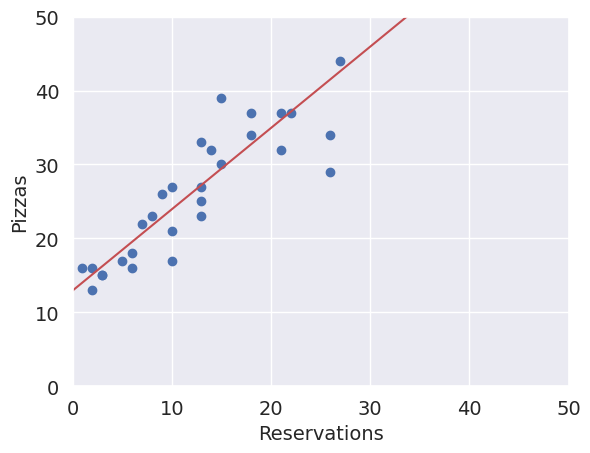

In [16]:
# grafiquemos la recta obtenida junto con los datos
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Reservations', fontsize=14)
plt.ylabel('Pizzas', fontsize=14)
plt.plot(X, Y, 'bo')
plt.plot([0, 50], [b, 50*w+b], 'r')

In [17]:
# hagamos de nuevo la misma prediccion
x = 21
y = predict_bias(x, w, b)
print(f"Reservations: {x} => Pizzas: {y}")

Reservations: 21 => Pizzas: 36.02999999999979


### Conclusiones
- Implementamos un modelo de regresion lineal simple
- Implementamos una funcion de perdida (mean squared error)
- Implementamos una funcion para entrenar el modelo

Pudimos ver que el modelo no se ajusta bien a los datos, por lo que implementamos un modelo de regresion lineal con sesgo, eso nos permitio obtener un error cuadratico medio menor y una mejor prediccion de las ventas de pizzas.
